# Alzheimer

In [12]:
from keras.src.models import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

In [13]:
# Verificar se há GPUs disponíveis
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"GPUs disponíveis: {gpus}")
else:
    print("Nenhuma GPU disponível.")

Nenhuma GPU disponível.


In [14]:
# Inicializa a CNN
classfier = Sequential()

# Convolução e pooling
classfier.add(Conv2D(32, (3, 3), input_shape=(256, 124, 1), activation='relu')) 
classfier.add(MaxPooling2D(pool_size=(2, 2)))

classfier.add(Conv2D(64, (3, 3), activation='relu'))
classfier.add(MaxPooling2D(pool_size=(2, 2)))

classfier.add(Conv2D(128, (3, 3), activation='relu'))
classfier.add(MaxPooling2D(pool_size=(2, 2)))

classfier.add(Conv2D(256, (3, 3), activation='relu'))
classfier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classfier.add(Flatten())

# Conexão completa
classfier.add(Dense(units=128, activation='relu'))
classfier.add(Dense(units=1, activation='sigmoid'))

# Compilando a rede com class_weight
classfier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [15]:
# Aumentando dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Assegurando que a proporção de classes seja considerada
training_set = train_datagen.flow_from_directory(
    'data/mri/train',
    target_size=(256, 124),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_set = test_datagen.flow_from_directory(
    'data/mri/validation',
    target_size=(256, 124),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 18656 images belonging to 2 classes.
Found 3292 images belonging to 2 classes.


In [16]:
# Treinamento da rede
classfier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/25
583/583 [==============================] - 160s 273ms/step - loss: 0.3478 - accuracy: 0.8426 - precision: 0.8160 - recall: 0.6990 - val_loss: 0.2016 - val_accuracy: 0.9134 - val_precision: 0.8394 - val_recall: 0.9248
Epoch 2/25
583/583 [==============================] - 175s 300ms/step - loss: 0.1872 - accuracy: 0.9250 - precision: 0.8951 - recall: 0.8852 - val_loss: 0.1338 - val_accuracy: 0.9505 - val_precision: 0.9290 - val_recall: 0.9265
Epoch 3/25
583/583 [==============================] - 200s 343ms/step - loss: 0.1282 - accuracy: 0.9480 - precision: 0.9258 - recall: 0.9222 - val_loss: 0.1859 - val_accuracy: 0.9295 - val_precision: 0.9923 - val_recall: 0.8009
Epoch 4/25
583/583 [==============================] - 186s 320ms/step - loss: 0.0969 - accuracy: 0.9645 - precision: 0.9491 - recall: 0.9472 - val_loss: 0.0508 - val_accuracy: 0.9821 - val_precision: 0.9926 - val_recall: 0.9549
Epoch 5/25
583/583 [==============================] - 172s 296ms/step - loss: 0.0682 - a

In [22]:
# Teste
test_image = image.load_img('data/mri/HC-15-20117-21446.png', color_mode='grayscale', target_size=(256, 124))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalização

result = classfier.predict(test_image)
print(result)

if result[0][0] >= 0.5:
    prediction = 'Not Alzheimer'
else:
    prediction = 'Alzheimer'
print(prediction)

1/1 [==============================] - 0s 21ms/step
[[0.99999976]]
Not Alzheimer


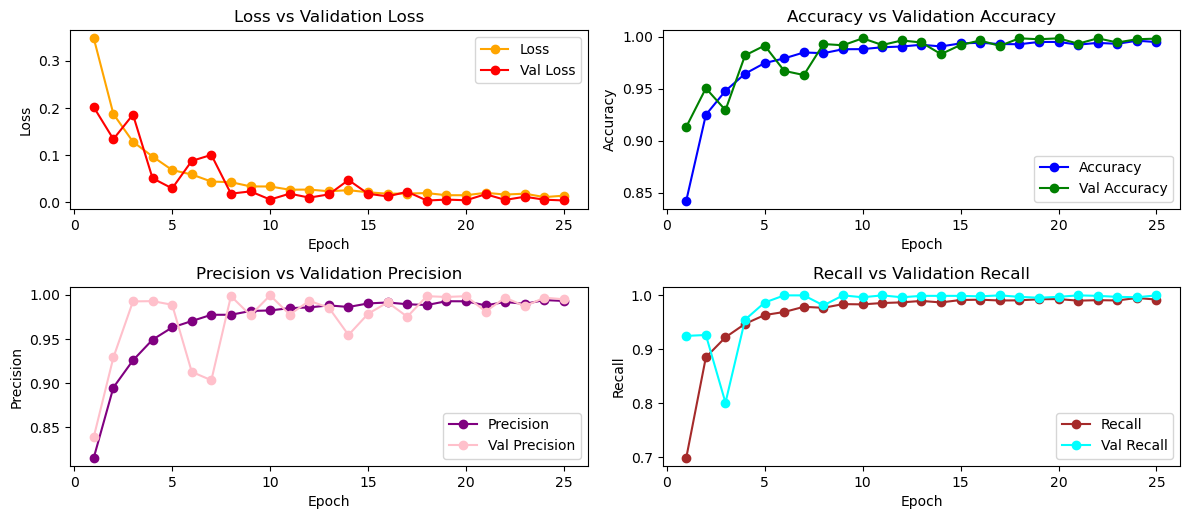

In [46]:
#Gráficos
import matplotlib.pyplot as plt
import pandas as pd

# Dados da tabela
df_five = pd.read_excel('../Resultados 25 epocas.xlsx')

epochs = df_five['Epoch']
loss = df_five['Loss']
accuracy = df_five['Accuracy']
precision = df_five['Precision']
recall = df_five['Recall']

val_loss = df_five['Val Loss']
val_accuracy = df_five['Val Accuracy']
val_precision = df_five['Val Precision']
val_recall = df_five['Val Recall']

# Configurações do gráfico
plt.figure(figsize=(12, 10), facecolor='none')

# Plotando Loss e Val Loss
plt.subplot(4, 2, 1)
plt.plot(epochs, loss, marker='o', label='Loss', color='orange')
plt.plot(epochs, val_loss, marker='o', label='Val Loss', color='red')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotando Accuracy e Val Accuracy
plt.subplot(4, 2, 2)
plt.plot(epochs, accuracy, marker='o', label='Accuracy', color='blue')
plt.plot(epochs, val_accuracy, marker='o', label='Val Accuracy', color='green')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotando Precision e Val Precision
plt.subplot(4, 2, 3)
plt.plot(epochs, precision, marker='o', label='Precision', color='purple')
plt.plot(epochs, val_precision, marker='o', label='Val Precision', color='pink')
plt.title('Precision vs Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plotando Recall e Val Recall
plt.subplot(4, 2, 4)
plt.plot(epochs, recall, marker='o', label='Recall', color='brown')
plt.plot(epochs, val_recall, marker='o', label='Val Recall', color='cyan')
plt.title('Recall vs Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Ajustando layout
plt.tight_layout()
plt.show()


In [44]:
df_five.describe()


,Epoch,Loss,Accuracy,Precision,Recall,Val Loss,Val Accuracy,Val Precision,Val Recall
count,5.000000,5.00000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.16578,0.930880,0.9105,0.881840,0.114120,0.952860,0.914000,0.958580
std,1.581139,0.12160,0.057728,0.0652,0.115922,0.076442,0.035557,0.078059,0.033601
min,1.000000,0.06370,0.834000,0.8043,0.682500,0.052300,0.894000,0.801100,0.919500
25%,2.000000,0.08770,0.924100,0.8951,0.882200,0.053700,0.948100,0.871400,0.940700
50%,3.000000,0.12260,0.952400,0.9338,0.927100,0.100500,0.962000,0.948300,0.945100
75%,4.000000,0.18850,0.966400,0.9521,0.950000,0.125100,0.979000,0.949200,0.992000
max,5.000000,0.36640,0.977500,0.9672,0.967400,0.239000,0.981200,1.000000,0.995600
